In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.metrics import classification_report,confusion_matrix
from scikitplot.metrics import plot_precision_recall,plot_roc
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTEENN
from collections import Counter 

In [17]:
df=pd.read_csv(r'C:\Users\gayat\Downloads\OnlineNewsPopularity.csv',skipinitialspace=True)

In [18]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [19]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [20]:
df.isnull().sum()

url                              0
timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_s

<AxesSubplot:>

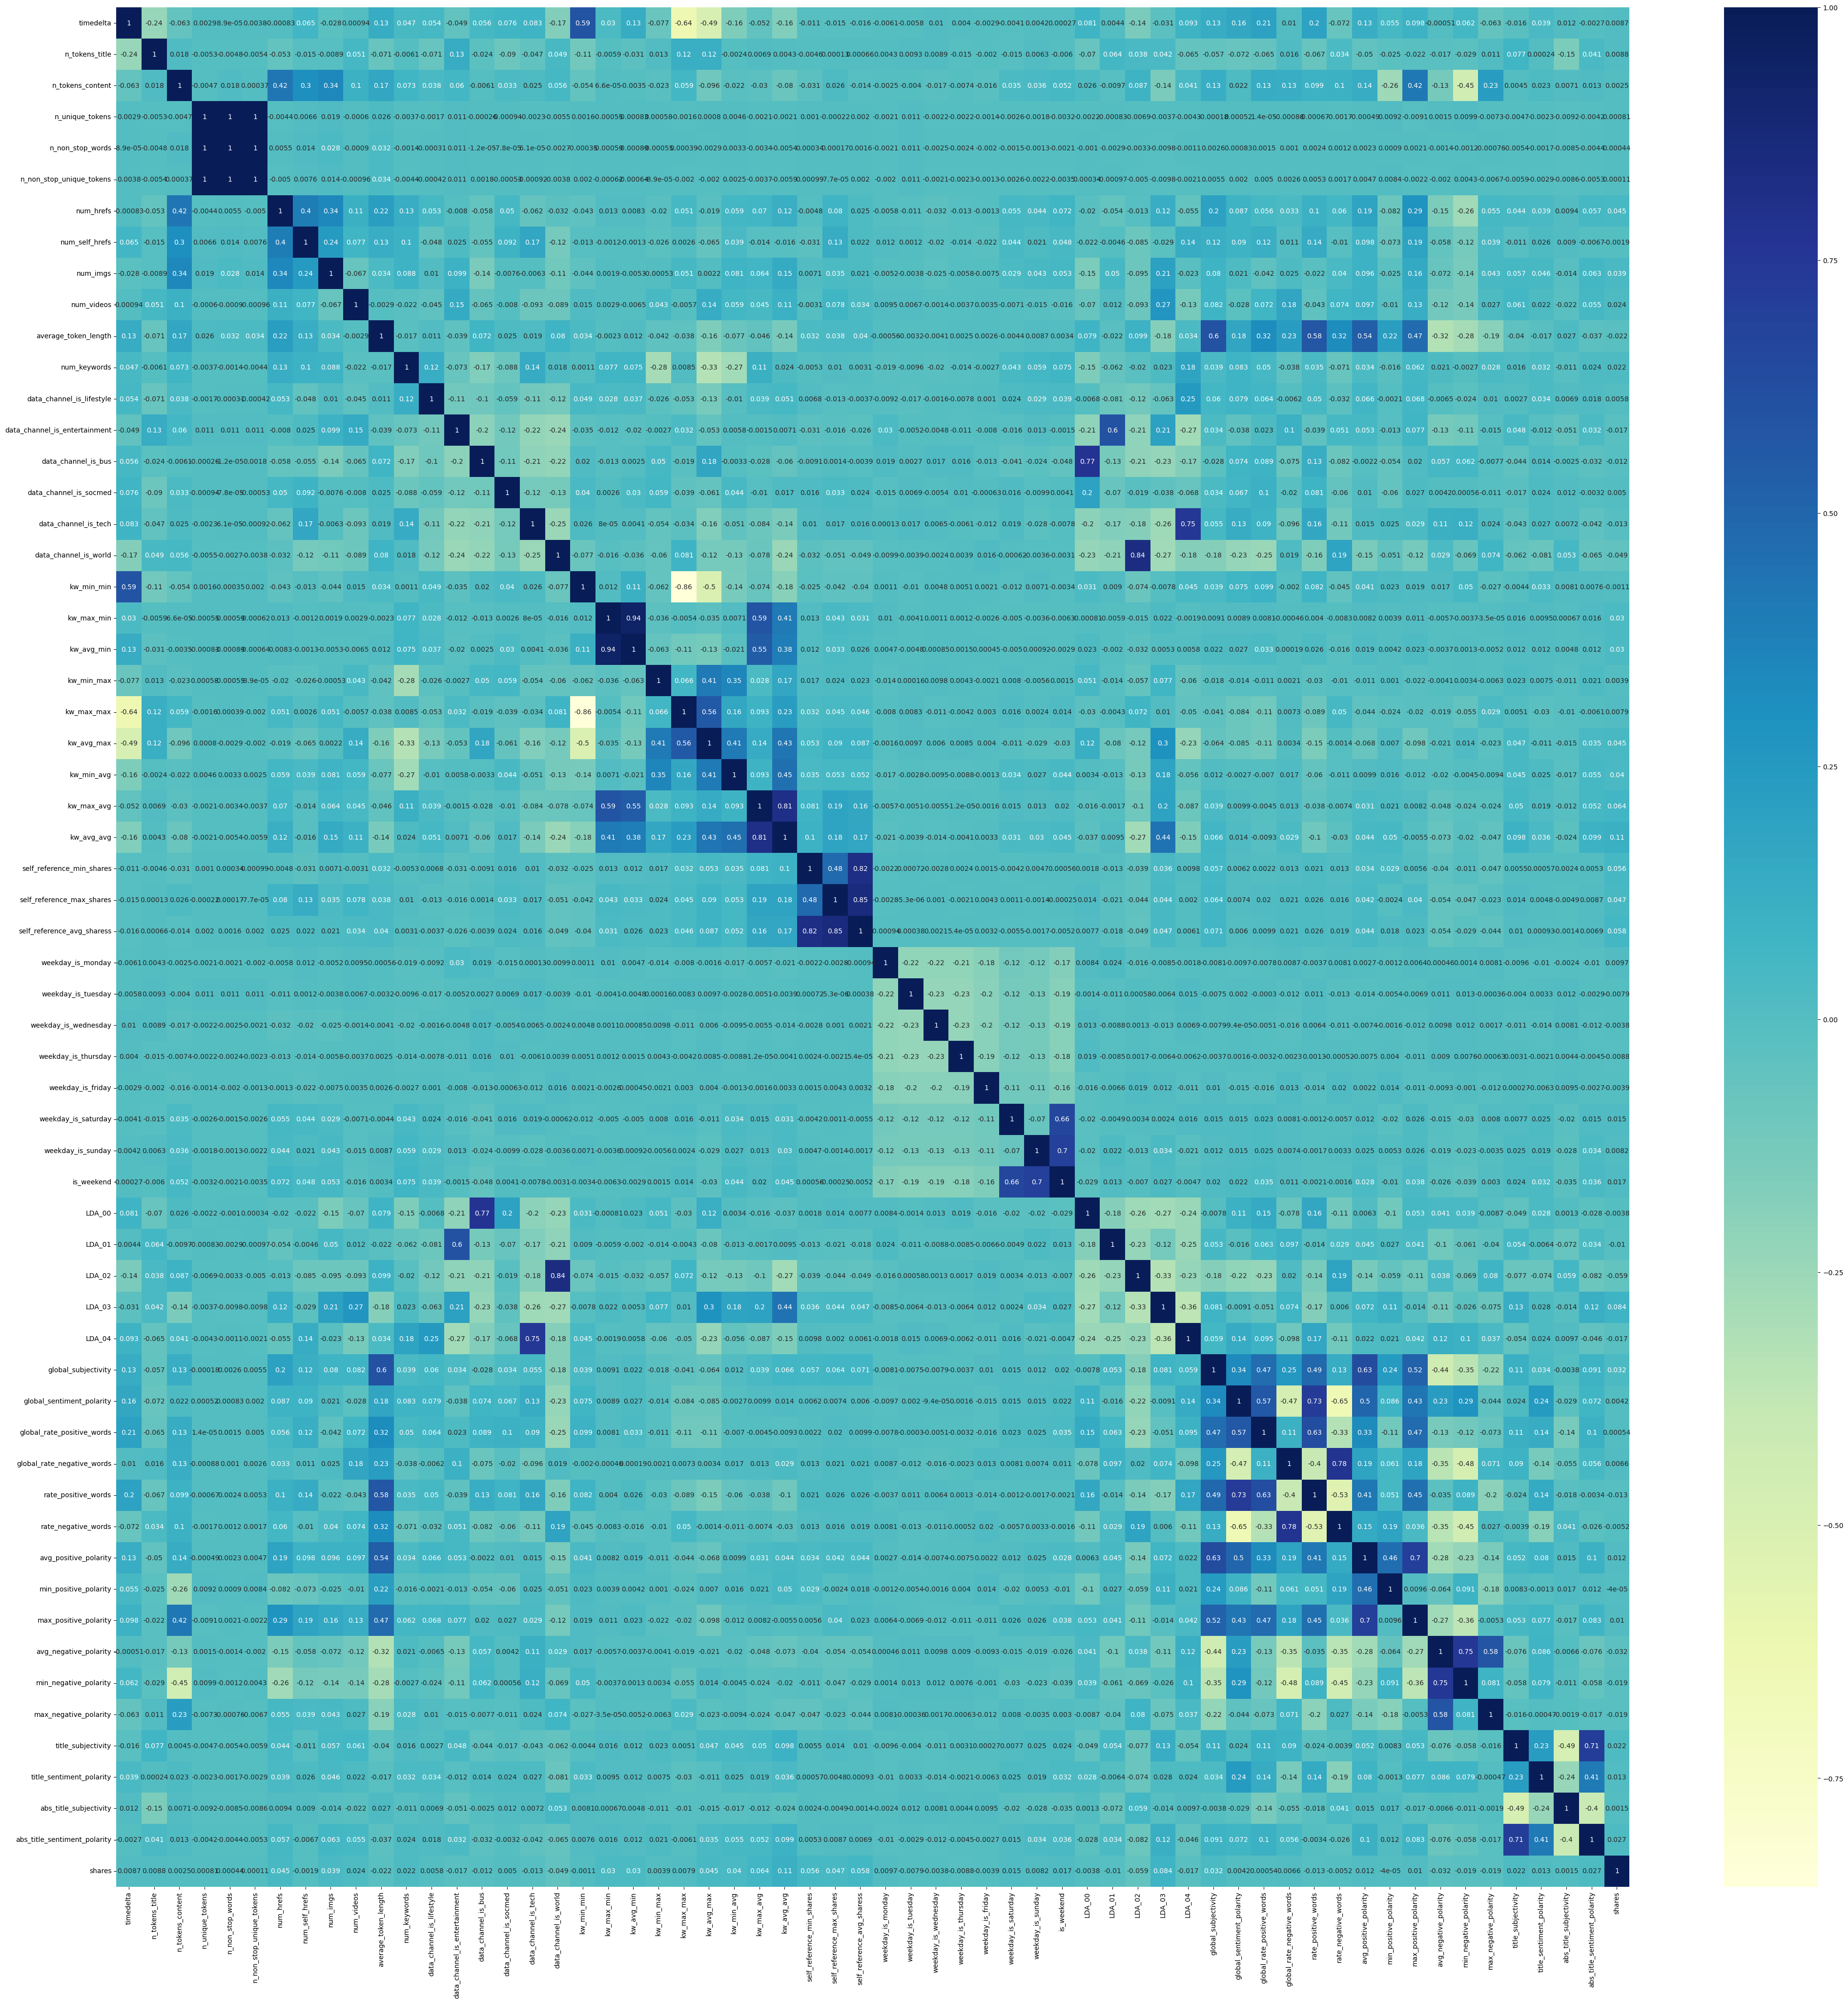

In [21]:
corr=df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(data=corr,annot=True,cmap='YlGnBu')

In [22]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [23]:
df.head(4)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200


In [26]:
df['shares'].max()

843300

Text(0.5, 1.0, 'Number of Shares')

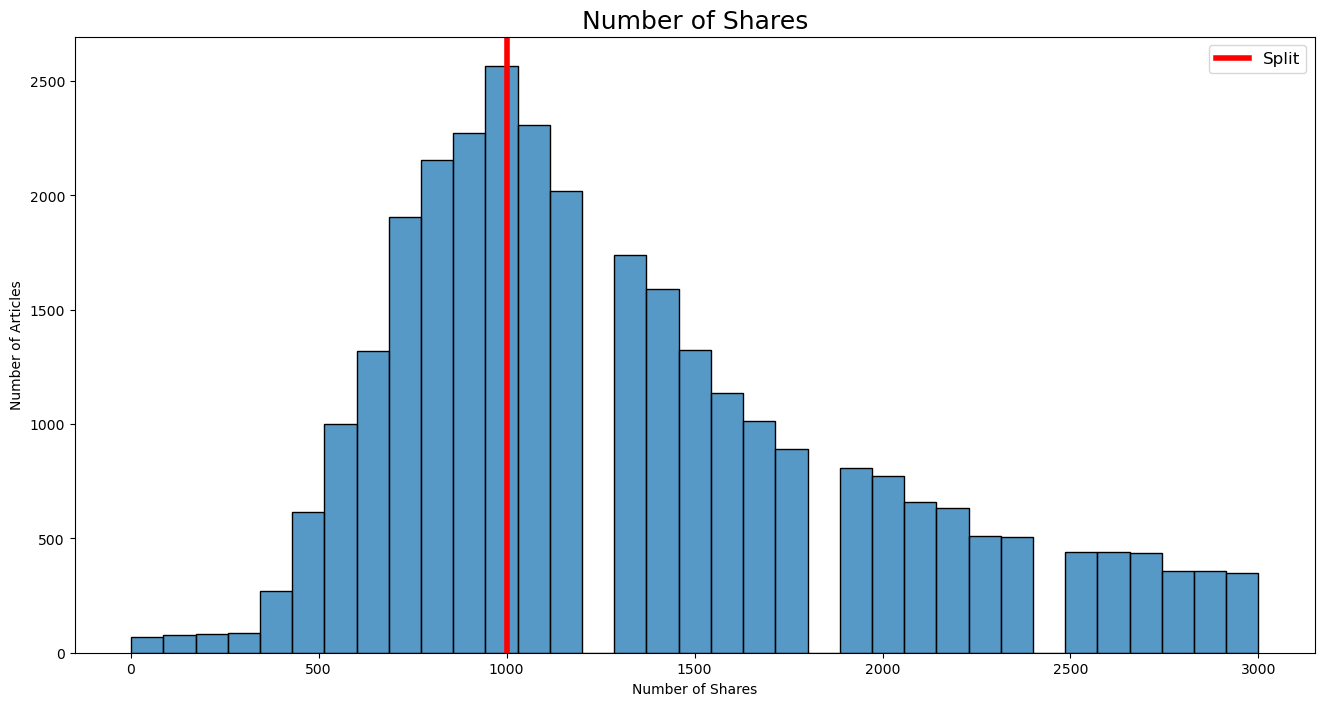

In [28]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
sns.histplot(df['shares'].drop(df[df['shares'] > 3000].index), bins=35)
mean = df['shares'].mean()
plt.axvline(1000, ls='-', c='red', label='Split', lw=4)
plt.legend(fontsize=12, loc=1)
plt.xlabel('Number of Shares')
plt.ylabel('Number of Articles')
plt.title(f'Number of Shares', fontsize=18)
#plt.savefig('comments', dpi=180)

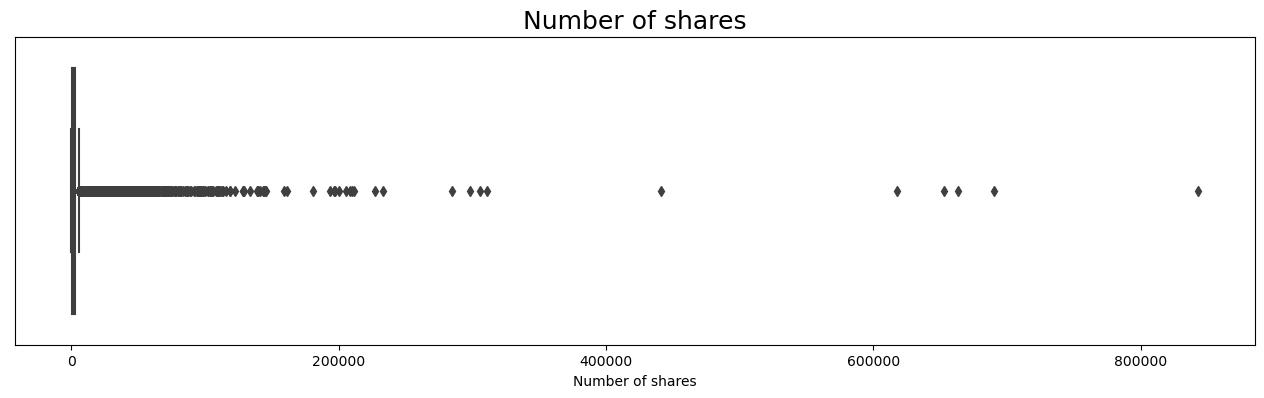

In [29]:
plt.figure(figsize=(16,4))
sns.boxplot(data=df['shares'], orient='h')
plt.xlabel('shares')
plt.yticks([])
plt.xlabel('Number of shares')
plt.title('Number of shares', fontsize=18);

In [30]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

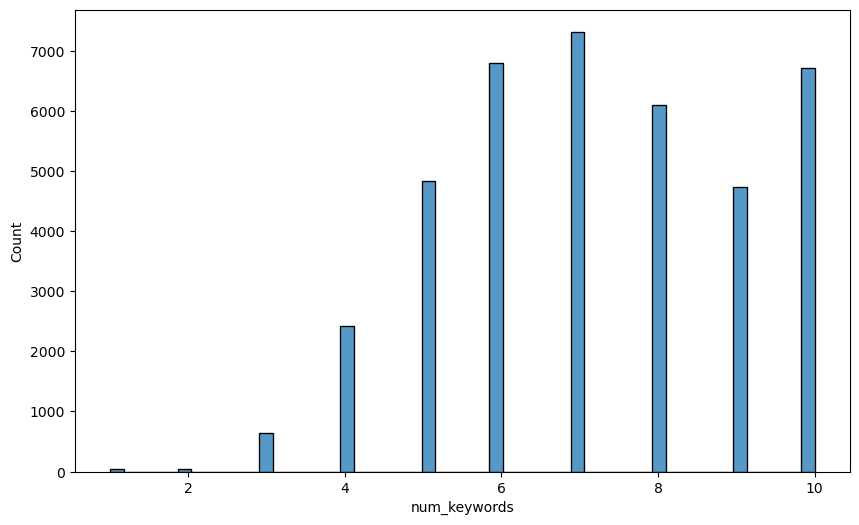

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='num_keywords');

In [37]:
#drop url column 
df.drop(df.columns[[0]], axis=1, inplace=True)

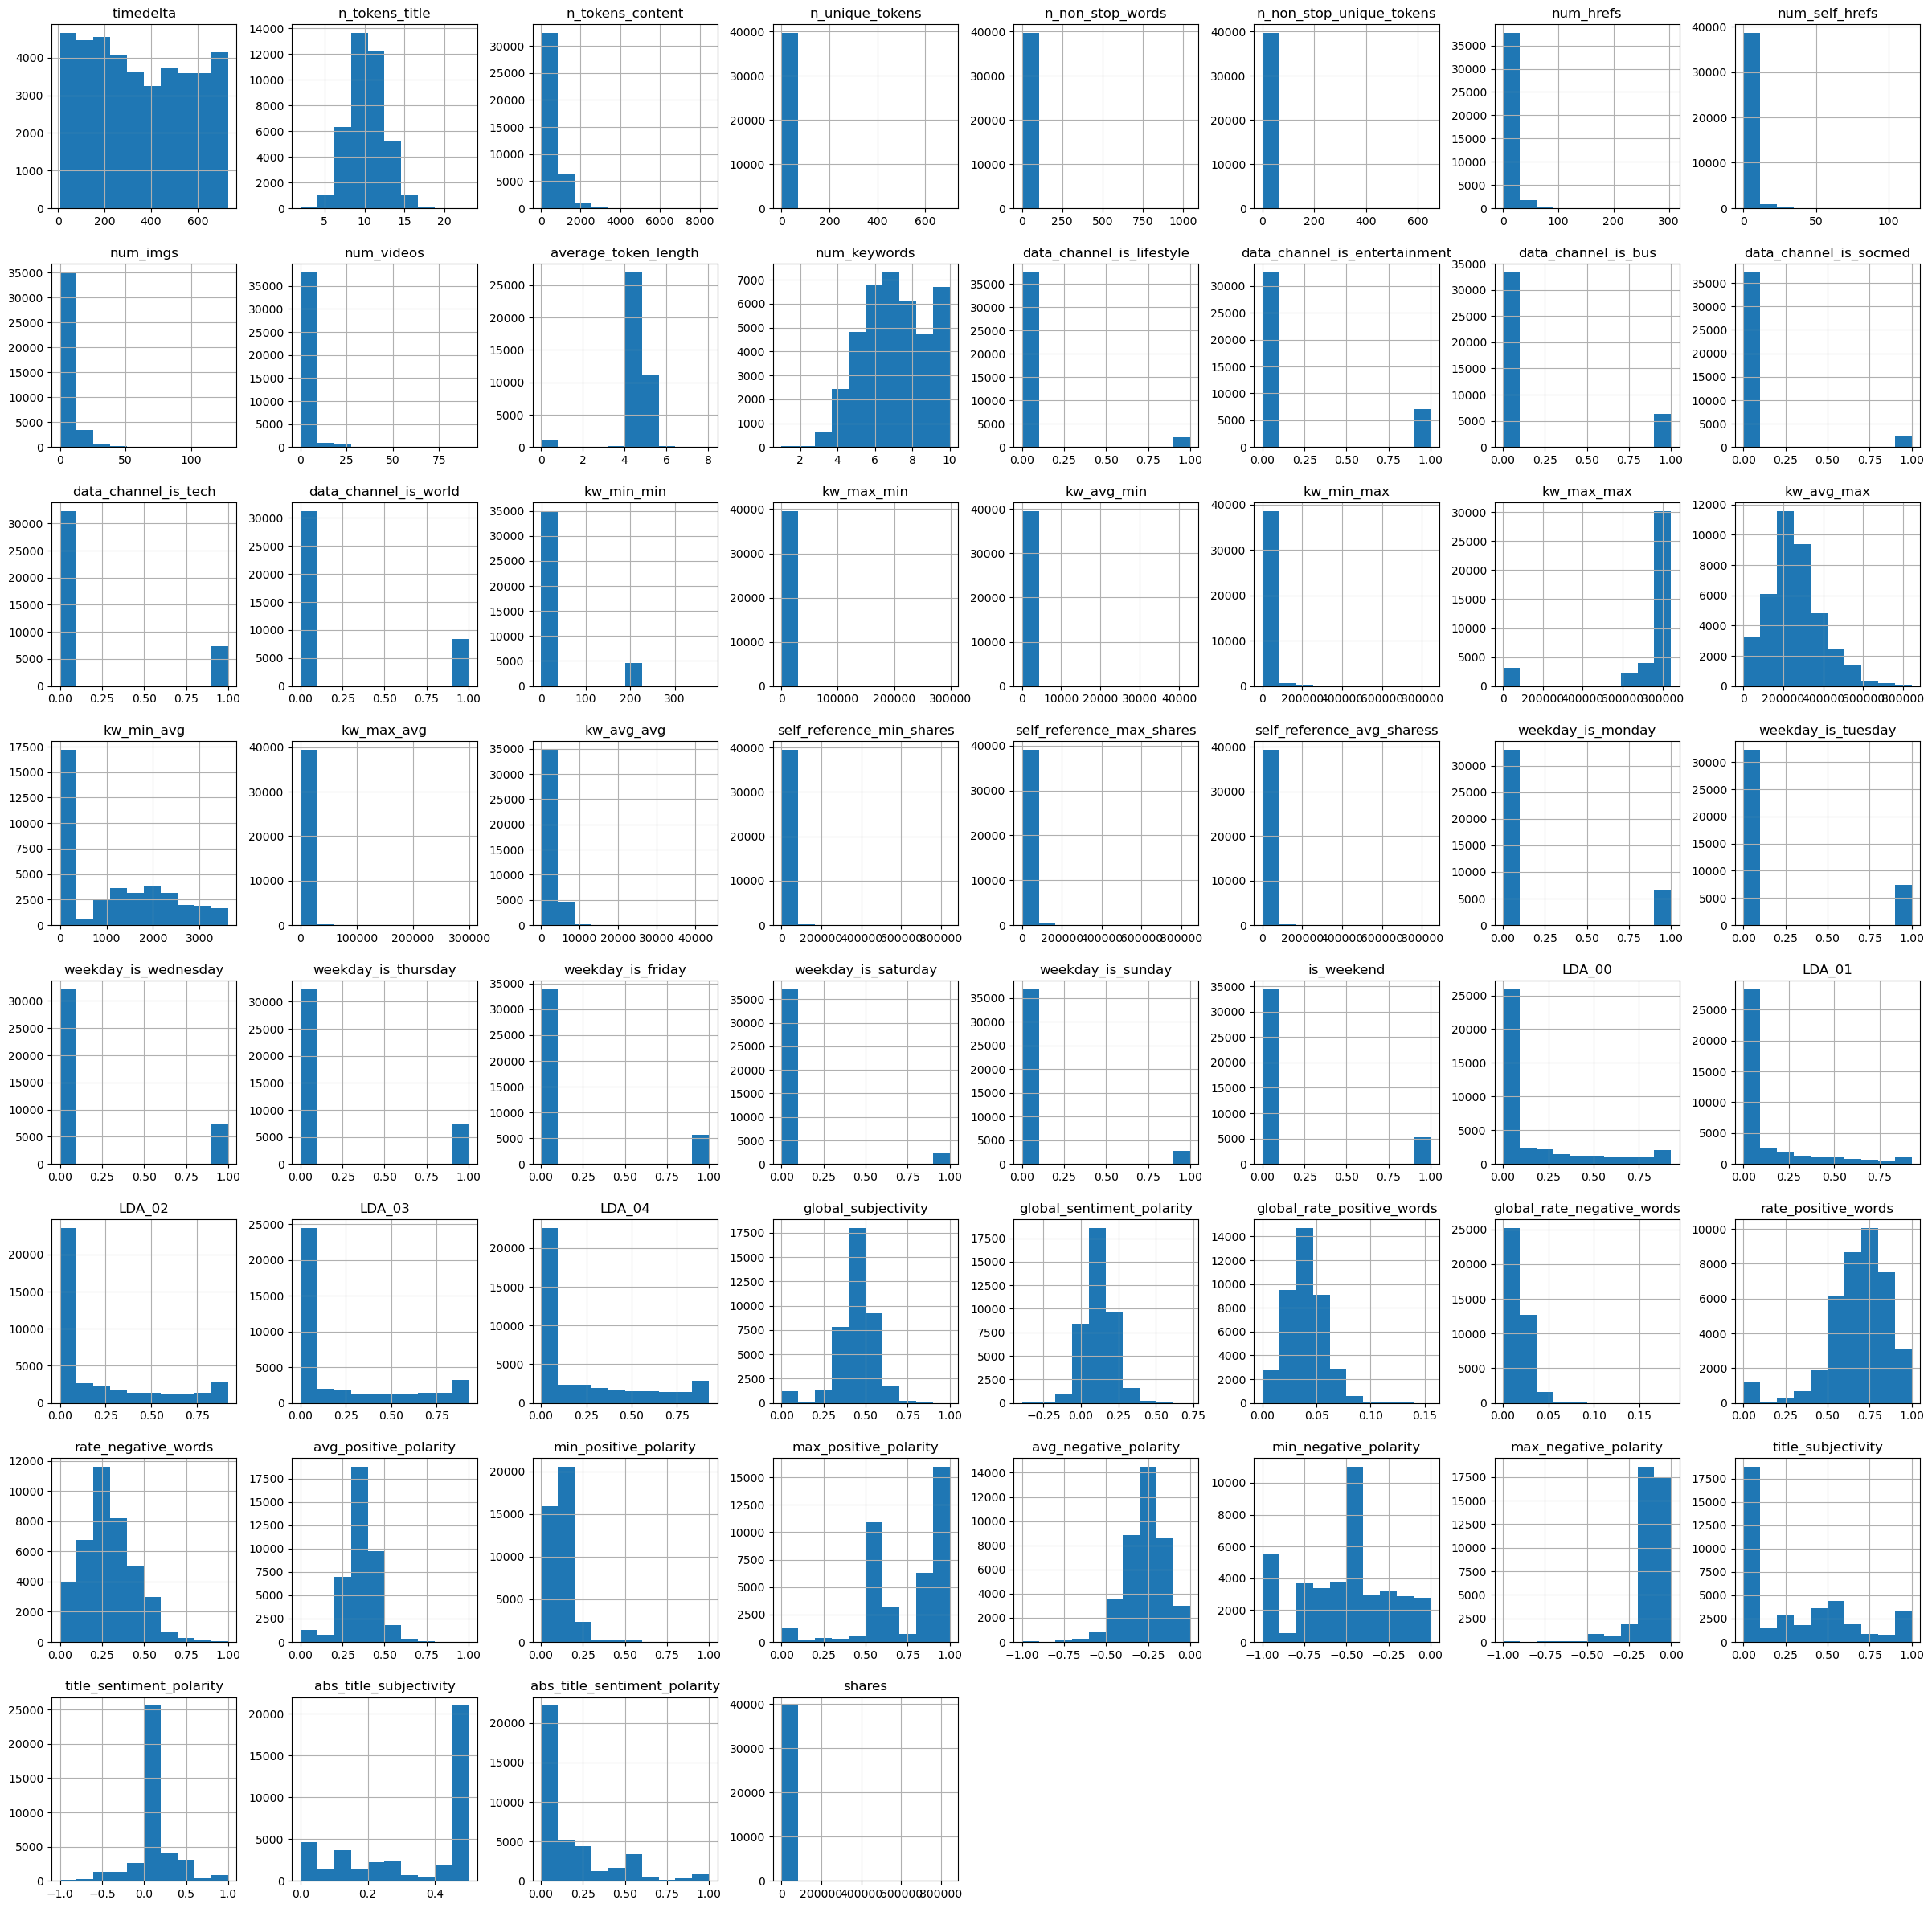

In [44]:
df.hist(figsize=(30,30))
plt.show()

REGRESSION APPROACH

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      39644 non-null  float64
 1   n_tokens_title                 39644 non-null  float64
 2   n_tokens_content               39644 non-null  float64
 3   n_unique_tokens                39644 non-null  float64
 4   n_non_stop_words               39644 non-null  float64
 5   n_non_stop_unique_tokens       39644 non-null  float64
 6   num_hrefs                      39644 non-null  float64
 7   num_self_hrefs                 39644 non-null  float64
 8   num_imgs                       39644 non-null  float64
 9   num_videos                     39644 non-null  float64
 10  average_token_length           39644 non-null  float64
 11  num_keywords                   39644 non-null  float64
 12  data_channel_is_lifestyle      39644 non-null 

In [67]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
df[numerical_features].head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [68]:
for feature in numerical_features:
    labels_ordered=df.groupby([feature])['shares'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [69]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,117,4,1251,22714,882,13979,40,31,17,18,3901,4,0,0,1,0,0,1,16,374,11197,576,17,23285,12071,13331,31240,2,252,5528,0,1,1,1,1,0,0,0,8899,15956,4488,7327,6403,8752,23396,8647,7187,1533,1533,21688,13,21,10223,31,28,432,619,336,473,0
1,117,10,1052,8266,545,317,42,28,17,18,10619,2,0,1,0,0,0,1,16,374,11197,576,17,23285,12071,13331,31240,716,615,6486,0,1,1,1,1,0,0,0,30256,4014,7268,1886,1171,18825,728,8770,6332,1281,1281,12607,20,21,10577,13,12,430,518,351,419,0
2,117,10,1706,7340,617,1883,42,28,17,18,14266,5,0,1,0,0,0,1,16,374,11197,576,17,23285,12071,13331,31240,443,574,6431,0,1,1,1,1,0,0,0,9105,6333,27538,25172,12549,17156,9632,4077,6436,1495,1494,21210,13,26,10195,33,17,430,518,351,419,0
3,117,10,1709,3880,811,1088,38,22,17,18,14583,6,0,0,1,0,0,1,16,374,11197,576,17,23285,12071,13331,31240,716,615,6486,0,1,1,1,1,0,0,0,24436,10016,17199,25526,18574,23372,25746,2342,1625,1459,1458,10534,8,20,6294,31,24,430,518,351,419,0
4,117,5,1661,10468,1084,8764,63,39,44,18,6032,6,0,1,1,0,1,1,16,374,11197,576,17,23285,12071,13331,31240,683,616,6318,0,1,1,1,1,0,0,0,27654,27765,30659,19605,18880,8878,10917,3843,5039,937,925,6697,20,26,3208,27,18,402,477,315,384,0


In [70]:
X=df.drop('shares',axis=1)
y=df['shares']

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=21,stratify=y)

In [72]:
scaling_feature=[feature for feature in X_train.columns]
len(scaling_feature)

59

In [73]:
feature_scale=[feature for feature in X_train.columns]
scaler=MinMaxScaler()
scaler.fit(X_train[feature_scale])

MinMaxScaler()

In [74]:
X_train_scaled=scaler.transform(X_train[feature_scale])
X_test_scaled=scaler.transform(X_test[feature_scale])

In [79]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor()
cat.fit(X_train_scaled,y_train)

Learning rate set to 0.070693
0:	learn: 0.3745516	total: 155ms	remaining: 2m 34s
1:	learn: 0.3483286	total: 166ms	remaining: 1m 22s
2:	learn: 0.3238906	total: 177ms	remaining: 58.7s
3:	learn: 0.3011837	total: 186ms	remaining: 46.4s
4:	learn: 0.2800865	total: 197ms	remaining: 39.2s
5:	learn: 0.2605694	total: 210ms	remaining: 34.7s
6:	learn: 0.2423283	total: 219ms	remaining: 31.1s
7:	learn: 0.2253445	total: 228ms	remaining: 28.2s
8:	learn: 0.2096649	total: 236ms	remaining: 26s
9:	learn: 0.1950494	total: 244ms	remaining: 24.2s
10:	learn: 0.1814314	total: 251ms	remaining: 22.6s
11:	learn: 0.1687168	total: 258ms	remaining: 21.2s
12:	learn: 0.1569422	total: 265ms	remaining: 20.1s
13:	learn: 0.1459115	total: 272ms	remaining: 19.1s
14:	learn: 0.1358190	total: 278ms	remaining: 18.3s
15:	learn: 0.1263738	total: 285ms	remaining: 17.5s
16:	learn: 0.1176059	total: 291ms	remaining: 16.9s
17:	learn: 0.1093817	total: 298ms	remaining: 16.2s
18:	learn: 0.1018105	total: 304ms	remaining: 15.7s
19:	learn: 

160:	learn: 0.0021007	total: 1.23s	remaining: 6.4s
161:	learn: 0.0020987	total: 1.24s	remaining: 6.39s
162:	learn: 0.0020892	total: 1.24s	remaining: 6.38s
163:	learn: 0.0020885	total: 1.25s	remaining: 6.38s
164:	learn: 0.0020866	total: 1.26s	remaining: 6.37s
165:	learn: 0.0020851	total: 1.26s	remaining: 6.35s
166:	learn: 0.0020841	total: 1.27s	remaining: 6.34s
167:	learn: 0.0020798	total: 1.28s	remaining: 6.33s
168:	learn: 0.0020784	total: 1.28s	remaining: 6.31s
169:	learn: 0.0020717	total: 1.29s	remaining: 6.3s
170:	learn: 0.0020708	total: 1.3s	remaining: 6.29s
171:	learn: 0.0020650	total: 1.3s	remaining: 6.27s
172:	learn: 0.0020621	total: 1.31s	remaining: 6.26s
173:	learn: 0.0020587	total: 1.32s	remaining: 6.25s
174:	learn: 0.0020414	total: 1.32s	remaining: 6.24s
175:	learn: 0.0020390	total: 1.33s	remaining: 6.23s
176:	learn: 0.0020321	total: 1.34s	remaining: 6.22s
177:	learn: 0.0020283	total: 1.34s	remaining: 6.21s
178:	learn: 0.0020273	total: 1.35s	remaining: 6.19s
179:	learn: 0.00

335:	learn: 0.0013574	total: 2.46s	remaining: 4.86s
336:	learn: 0.0013536	total: 2.47s	remaining: 4.85s
337:	learn: 0.0013503	total: 2.47s	remaining: 4.85s
338:	learn: 0.0013473	total: 2.48s	remaining: 4.84s
339:	learn: 0.0013465	total: 2.49s	remaining: 4.83s
340:	learn: 0.0013417	total: 2.5s	remaining: 4.82s
341:	learn: 0.0013396	total: 2.5s	remaining: 4.82s
342:	learn: 0.0013353	total: 2.51s	remaining: 4.81s
343:	learn: 0.0013261	total: 2.52s	remaining: 4.8s
344:	learn: 0.0013182	total: 2.52s	remaining: 4.79s
345:	learn: 0.0013152	total: 2.53s	remaining: 4.79s
346:	learn: 0.0013118	total: 2.54s	remaining: 4.78s
347:	learn: 0.0013081	total: 2.55s	remaining: 4.77s
348:	learn: 0.0013068	total: 2.55s	remaining: 4.76s
349:	learn: 0.0013039	total: 2.56s	remaining: 4.75s
350:	learn: 0.0012993	total: 2.57s	remaining: 4.75s
351:	learn: 0.0012938	total: 2.57s	remaining: 4.74s
352:	learn: 0.0012919	total: 2.58s	remaining: 4.73s
353:	learn: 0.0012893	total: 2.59s	remaining: 4.72s
354:	learn: 0.0

514:	learn: 0.0009416	total: 3.71s	remaining: 3.5s
515:	learn: 0.0009404	total: 3.72s	remaining: 3.49s
516:	learn: 0.0009394	total: 3.73s	remaining: 3.48s
517:	learn: 0.0009383	total: 3.73s	remaining: 3.48s
518:	learn: 0.0009372	total: 3.74s	remaining: 3.47s
519:	learn: 0.0009359	total: 3.75s	remaining: 3.46s
520:	learn: 0.0009356	total: 3.76s	remaining: 3.45s
521:	learn: 0.0009344	total: 3.76s	remaining: 3.44s
522:	learn: 0.0009333	total: 3.77s	remaining: 3.44s
523:	learn: 0.0009323	total: 3.77s	remaining: 3.43s
524:	learn: 0.0009314	total: 3.78s	remaining: 3.42s
525:	learn: 0.0009298	total: 3.79s	remaining: 3.41s
526:	learn: 0.0009288	total: 3.79s	remaining: 3.41s
527:	learn: 0.0009280	total: 3.8s	remaining: 3.4s
528:	learn: 0.0009267	total: 3.81s	remaining: 3.39s
529:	learn: 0.0009249	total: 3.82s	remaining: 3.38s
530:	learn: 0.0009241	total: 3.82s	remaining: 3.38s
531:	learn: 0.0009226	total: 3.83s	remaining: 3.37s
532:	learn: 0.0009214	total: 3.84s	remaining: 3.36s
533:	learn: 0.0

689:	learn: 0.0007476	total: 4.95s	remaining: 2.23s
690:	learn: 0.0007463	total: 4.96s	remaining: 2.22s
691:	learn: 0.0007456	total: 4.97s	remaining: 2.21s
692:	learn: 0.0007450	total: 4.98s	remaining: 2.2s
693:	learn: 0.0007442	total: 4.98s	remaining: 2.2s
694:	learn: 0.0007437	total: 4.99s	remaining: 2.19s
695:	learn: 0.0007419	total: 5s	remaining: 2.18s
696:	learn: 0.0007408	total: 5s	remaining: 2.17s
697:	learn: 0.0007401	total: 5.01s	remaining: 2.17s
698:	learn: 0.0007393	total: 5.02s	remaining: 2.16s
699:	learn: 0.0007386	total: 5.03s	remaining: 2.15s
700:	learn: 0.0007383	total: 5.03s	remaining: 2.15s
701:	learn: 0.0007368	total: 5.04s	remaining: 2.14s
702:	learn: 0.0007352	total: 5.04s	remaining: 2.13s
703:	learn: 0.0007342	total: 5.05s	remaining: 2.12s
704:	learn: 0.0007336	total: 5.06s	remaining: 2.12s
705:	learn: 0.0007332	total: 5.07s	remaining: 2.11s
706:	learn: 0.0007332	total: 5.07s	remaining: 2.1s
707:	learn: 0.0007329	total: 5.08s	remaining: 2.1s
708:	learn: 0.0007319	

855:	learn: 0.0006221	total: 6.17s	remaining: 1.04s
856:	learn: 0.0006219	total: 6.17s	remaining: 1.03s
857:	learn: 0.0006212	total: 6.18s	remaining: 1.02s
858:	learn: 0.0006202	total: 6.19s	remaining: 1.02s
859:	learn: 0.0006194	total: 6.2s	remaining: 1.01s
860:	learn: 0.0006193	total: 6.2s	remaining: 1s
861:	learn: 0.0006188	total: 6.21s	remaining: 994ms
862:	learn: 0.0006184	total: 6.22s	remaining: 987ms
863:	learn: 0.0006176	total: 6.22s	remaining: 980ms
864:	learn: 0.0006172	total: 6.23s	remaining: 973ms
865:	learn: 0.0006168	total: 6.24s	remaining: 965ms
866:	learn: 0.0006164	total: 6.25s	remaining: 958ms
867:	learn: 0.0006162	total: 6.25s	remaining: 951ms
868:	learn: 0.0006155	total: 6.26s	remaining: 944ms
869:	learn: 0.0006149	total: 6.27s	remaining: 936ms
870:	learn: 0.0006140	total: 6.27s	remaining: 929ms
871:	learn: 0.0006139	total: 6.28s	remaining: 922ms
872:	learn: 0.0006133	total: 6.29s	remaining: 915ms
873:	learn: 0.0006130	total: 6.29s	remaining: 907ms
874:	learn: 0.000

In [80]:
print('Train Score: {} '.format(cat.score(X_train_scaled,y_train)))
print('Test Score :{} '.format(cat.score(X_test_scaled,y_test)))

Train Score: 0.9999980882341533 
Test Score :0.9998934934249322 


Text(0.5, 0, 'CATBOOST Classifier Feature Importance')

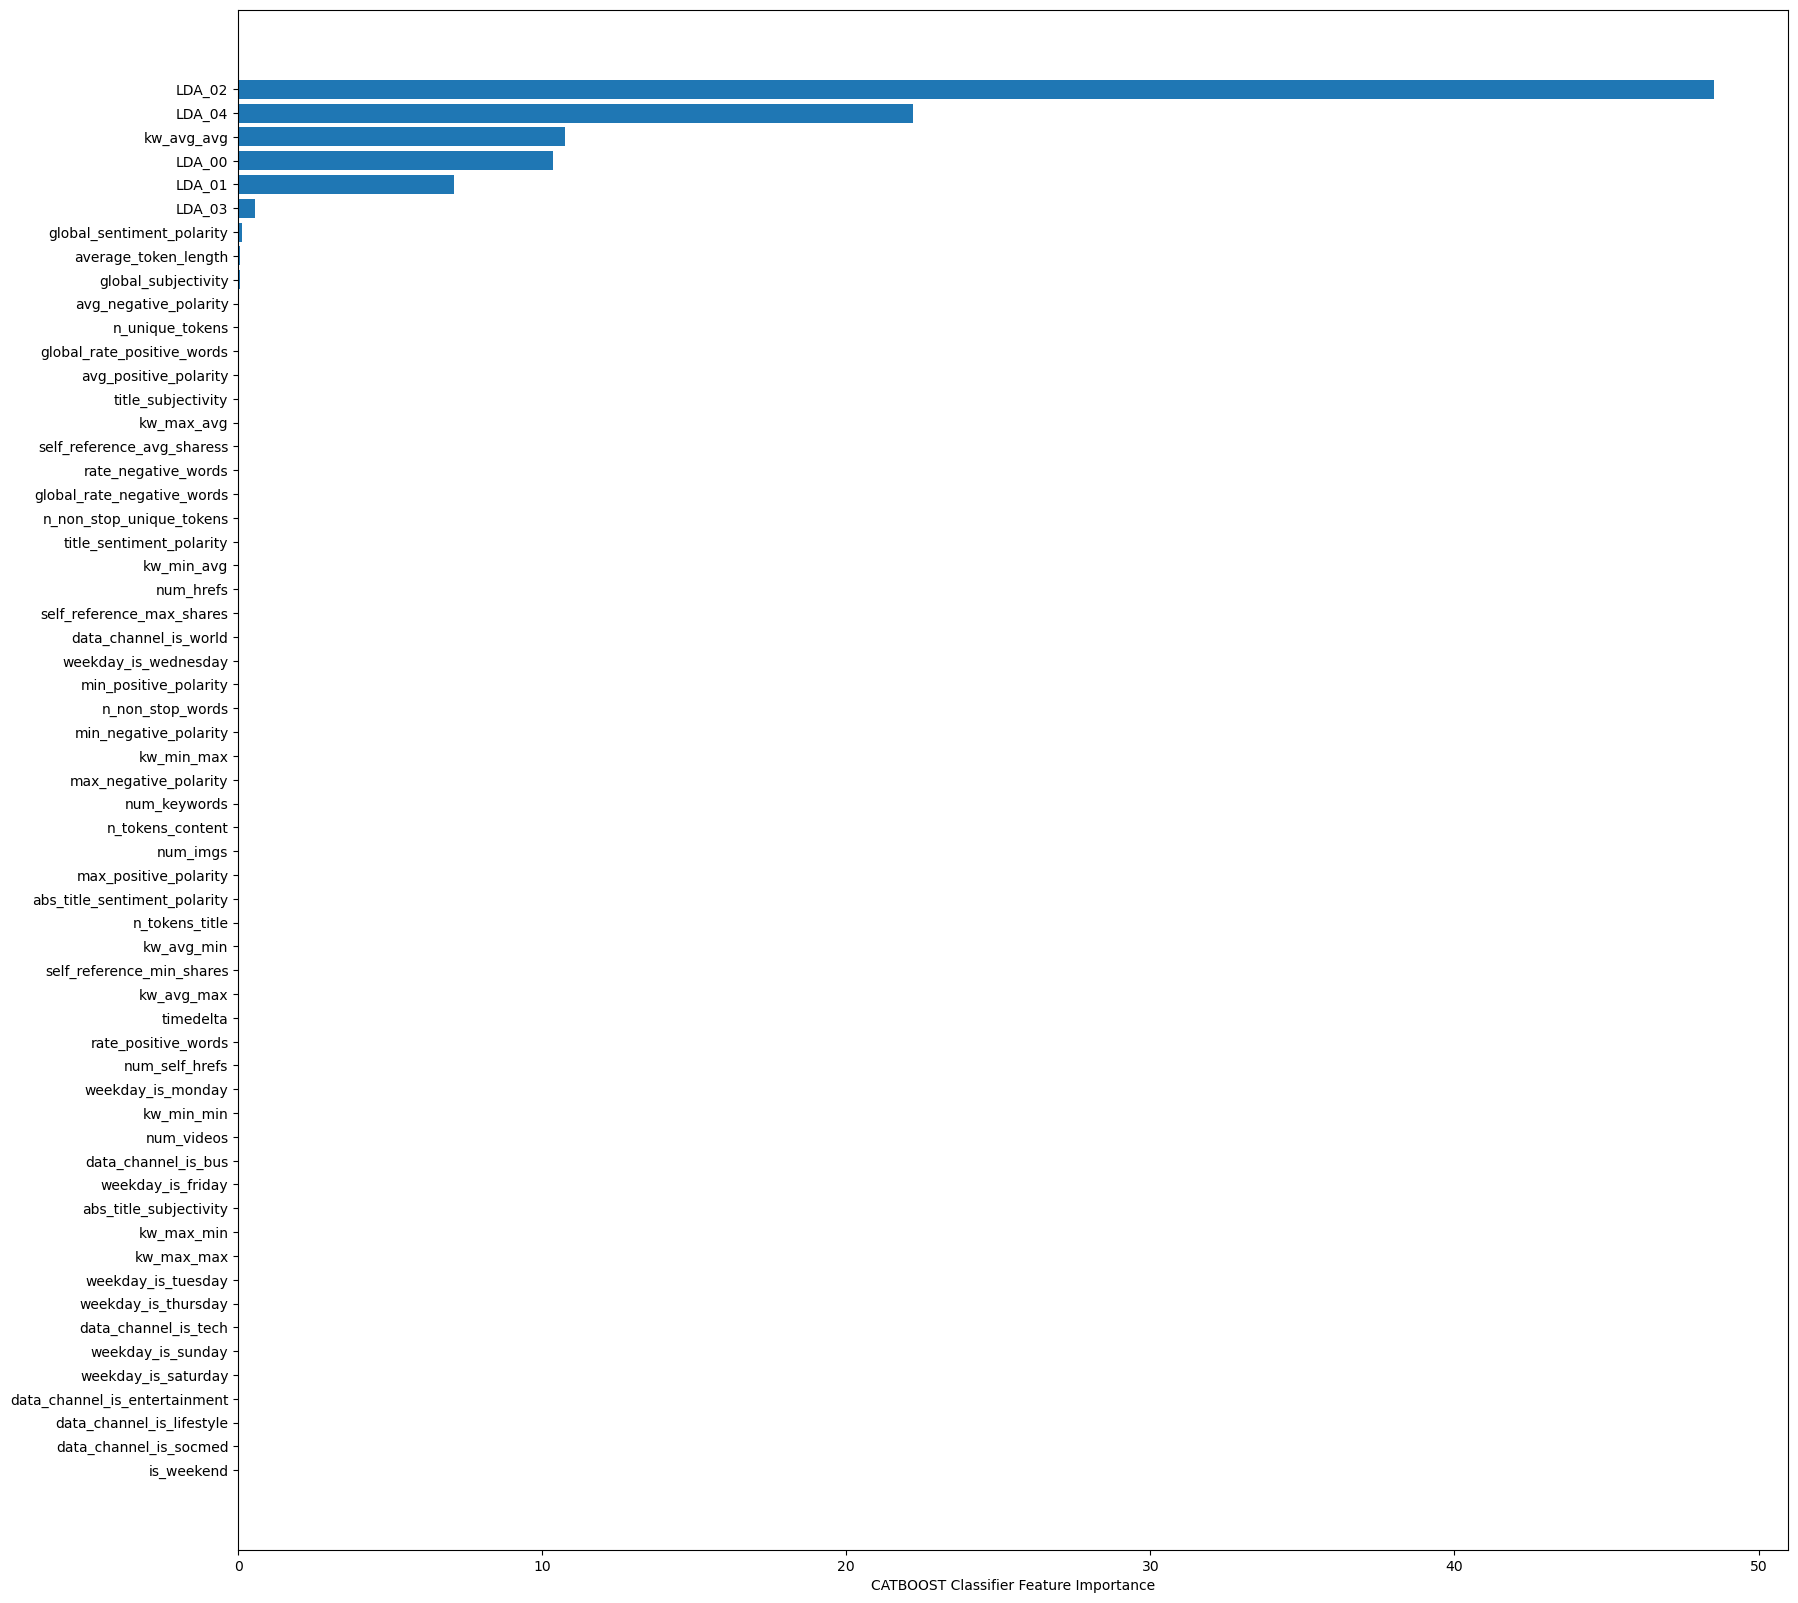

In [82]:
feature_names=X_train.columns
plt.figure(figsize=(20,20))
cat.feature_importances_
sorted_idx=cat.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx],cat.feature_importances_[sorted_idx])
plt.xlabel('CATBOOST Classifier Feature Importance')

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf_1=RandomForestRegressor()
rf_1.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [77]:
print('Train Score: {} '.format(rf_1.score(X_train_scaled,y_train)))
print('Test Score :{} '.format(rf_1.score(X_test_scaled,y_test)))

Train Score: 0.9999249117648551 
Test Score :0.9997579751942008 


Text(0.5, 0, 'Random Forest Cllassifier Feature Importance')

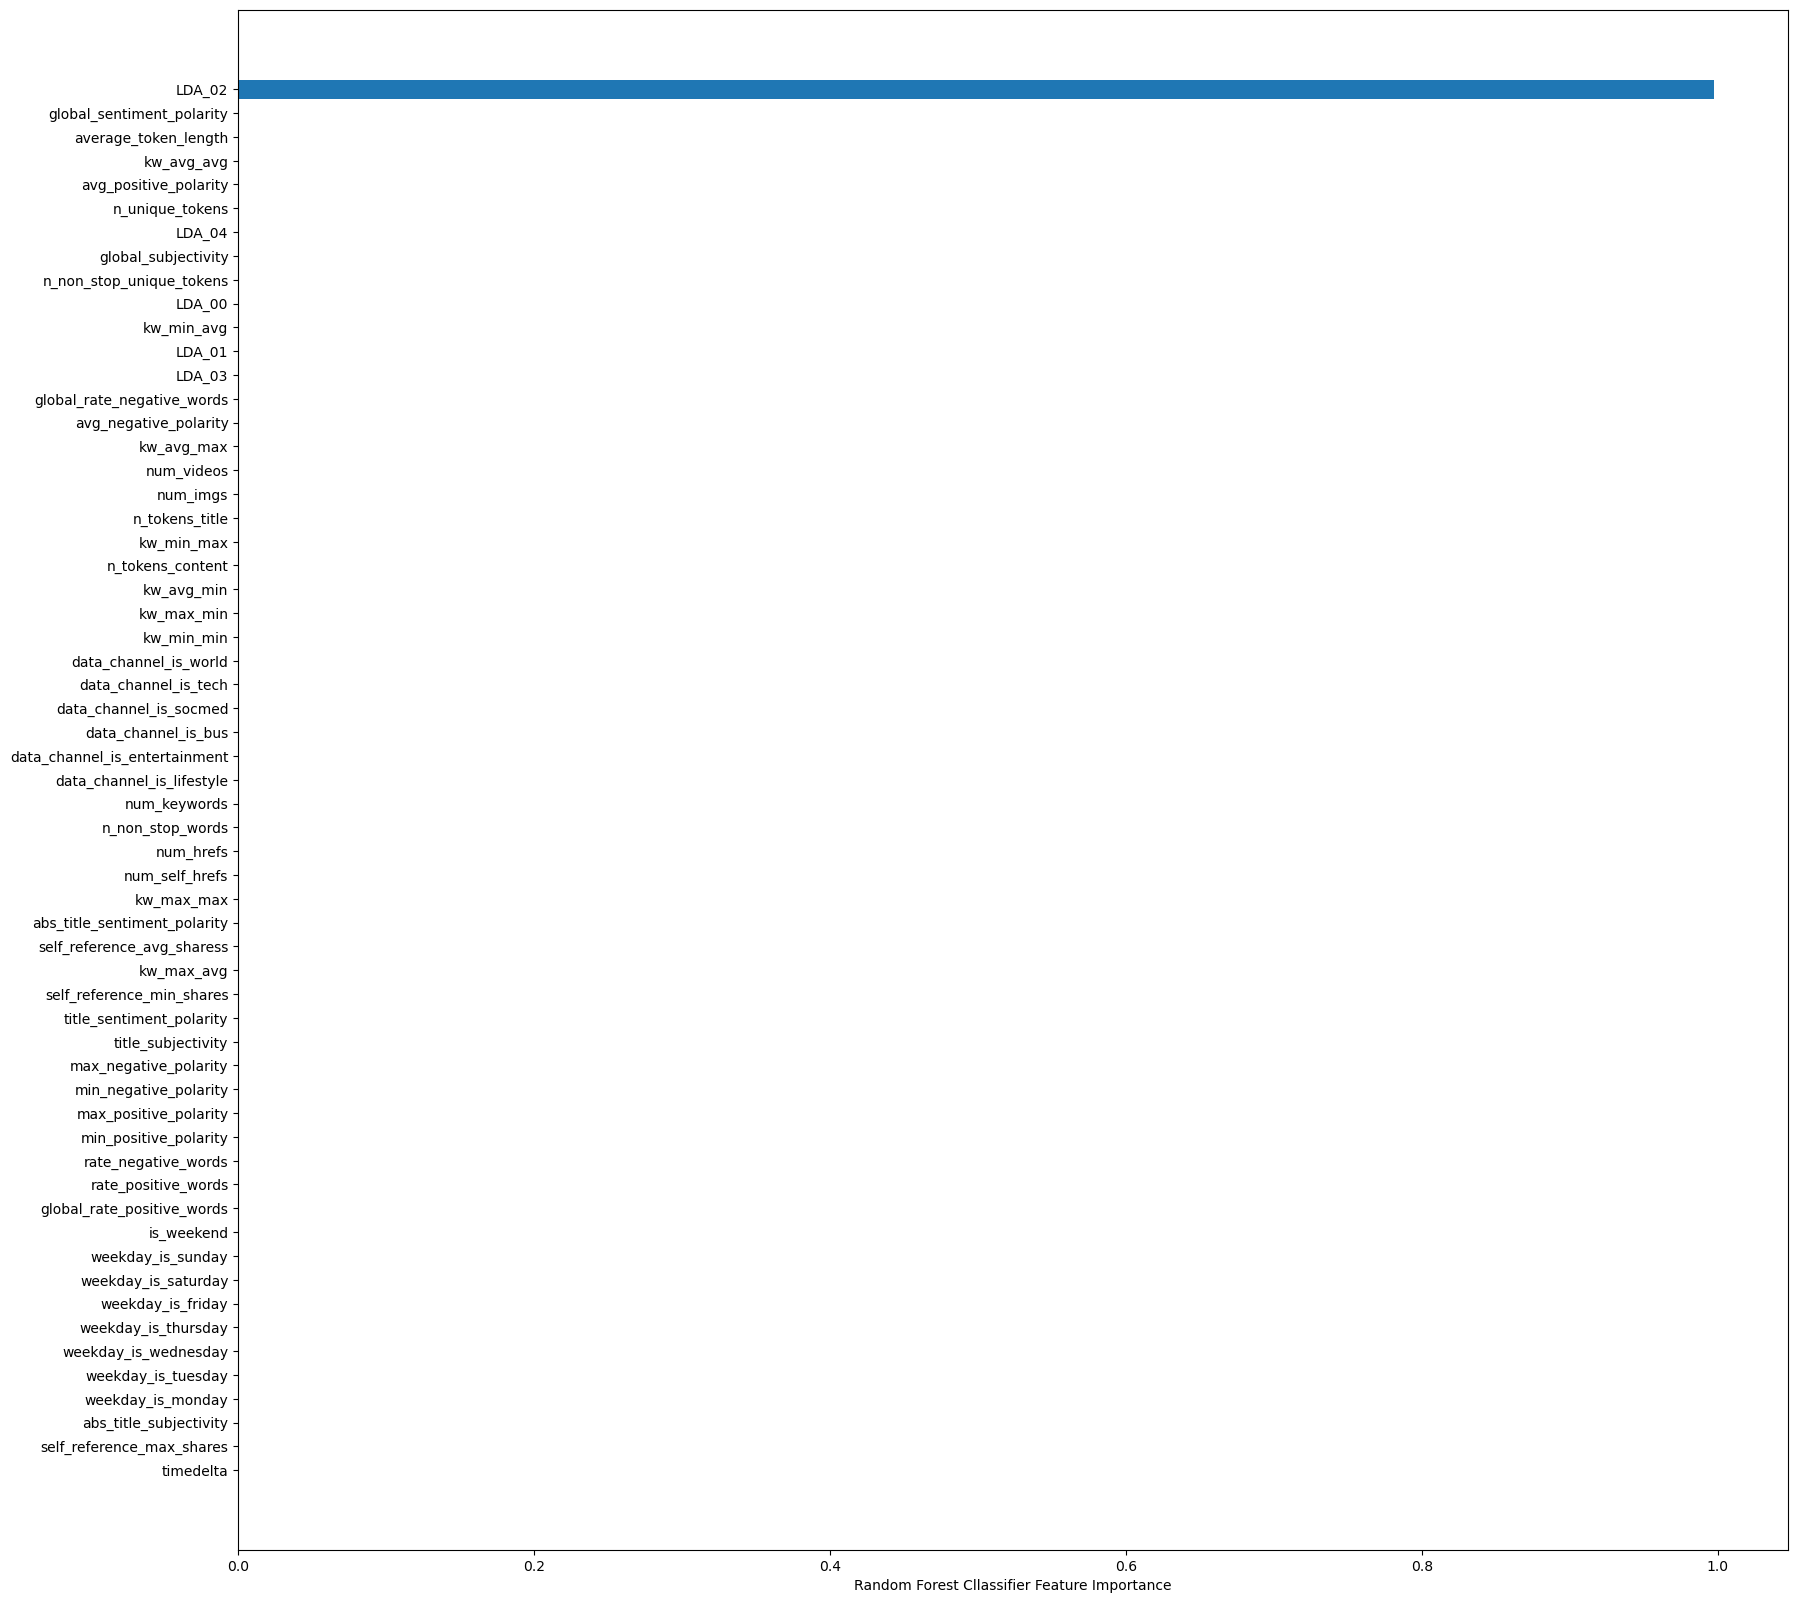

In [78]:
feature_names=X_train.columns
plt.figure(figsize=(20,20))
rf_1.feature_importances_
sorted_idx=rf_1.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx],rf_1.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Cllassifier Feature Importance')

As we can see that though Regression approach is giving high input but from feature importance we can see it's not performing good as it's using only one variable while predicting so we'll go further with classification approach

CLASSIFICATION APPROACH

In [87]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,117,4,1251,22714,882,13979,40,31,17,18,3901,4,0,0,1,0,0,1,16,374,11197,576,17,23285,12071,13331,31240,2,252,5528,0,1,1,1,1,0,0,0,8899,15956,4488,7327,6403,8752,23396,8647,7187,1533,1533,21688,13,21,10223,31,28,432,619,336,473,0
1,117,10,1052,8266,545,317,42,28,17,18,10619,2,0,1,0,0,0,1,16,374,11197,576,17,23285,12071,13331,31240,716,615,6486,0,1,1,1,1,0,0,0,30256,4014,7268,1886,1171,18825,728,8770,6332,1281,1281,12607,20,21,10577,13,12,430,518,351,419,0
2,117,10,1706,7340,617,1883,42,28,17,18,14266,5,0,1,0,0,0,1,16,374,11197,576,17,23285,12071,13331,31240,443,574,6431,0,1,1,1,1,0,0,0,9105,6333,27538,25172,12549,17156,9632,4077,6436,1495,1494,21210,13,26,10195,33,17,430,518,351,419,0
3,117,10,1709,3880,811,1088,38,22,17,18,14583,6,0,0,1,0,0,1,16,374,11197,576,17,23285,12071,13331,31240,716,615,6486,0,1,1,1,1,0,0,0,24436,10016,17199,25526,18574,23372,25746,2342,1625,1459,1458,10534,8,20,6294,31,24,430,518,351,419,0
4,117,5,1661,10468,1084,8764,63,39,44,18,6032,6,0,1,1,0,1,1,16,374,11197,576,17,23285,12071,13331,31240,683,616,6318,0,1,1,1,1,0,0,0,27654,27765,30659,19605,18880,8878,10917,3843,5039,937,925,6697,20,26,3208,27,18,402,477,315,384,0


In [83]:
mean=df['shares'].mean()

In [84]:
df['shares']=df['shares'].apply(lambda x: 0 if x<mean  else 1)

In [85]:
df['shares'].value_counts()

0    31565
1     8079
Name: shares, dtype: int64

In [86]:
X=df.drop('shares',axis=1)
y=df['shares']

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=21,stratify=y)

In [89]:
scaling_feature=[feature for feature in X_train.columns]
len(scaling_feature)

59

In [90]:
scaling_feature=[feature for feature in X_train.columns]
len(scaling_feature)

59

In [91]:
feature_scale=[feature for feature in X_train.columns]
scaler=MinMaxScaler()
scaler.fit(X_train[feature_scale])

MinMaxScaler()

In [92]:
X_train_scaled=scaler.transform(X_train[feature_scale])
X_test_scaled=scaler.transform(X_test[feature_scale])

In [93]:
smote=SMOTEENN()
smote_X_train,smote_y_train=smote.fit_resample(X_train_scaled,y_train)

In [94]:
print('Original Dataset Shape',Counter(y_train))
print('After SMOTE Dataset Shape',Counter(smote_y_train))

Original Dataset Shape Counter({0: 25252, 1: 6463})
After SMOTE Dataset Shape Counter({1: 25252, 0: 25239})


In [95]:
rf_1=RandomForestClassifier()
rf_1.fit(smote_X_train,smote_y_train)

RandomForestClassifier()

In [96]:
pred=rf_1.predict(X_test_scaled)
print('Train Score: {} '.format(rf_1.score(smote_X_train,smote_y_train)))
print('Test Score :{} '.format(rf_1.score(X_test_scaled,y_test)))

Train Score: 1.0 
Test Score :1.0 


In [97]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6313
           1       1.00      1.00      1.00      1616

    accuracy                           1.00      7929
   macro avg       1.00      1.00      1.00      7929
weighted avg       1.00      1.00      1.00      7929



<AxesSubplot:>

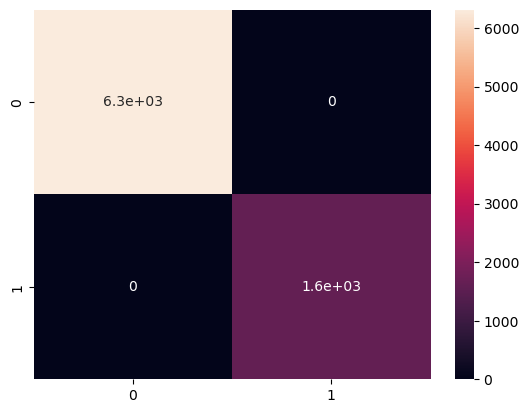

In [98]:
cf_matrix=confusion_matrix(y_test,pred)
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

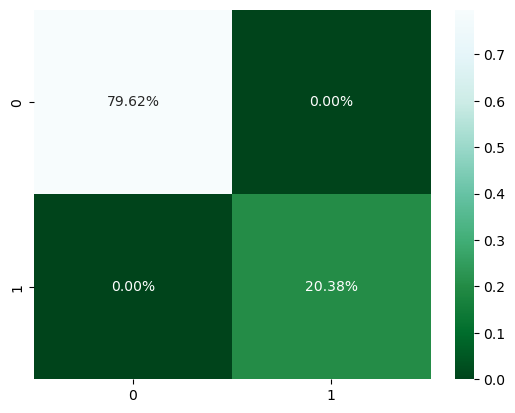

In [99]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='BuGn_r')

Text(0.5, 0, 'Random Forest Cllassifier Feature Importance')

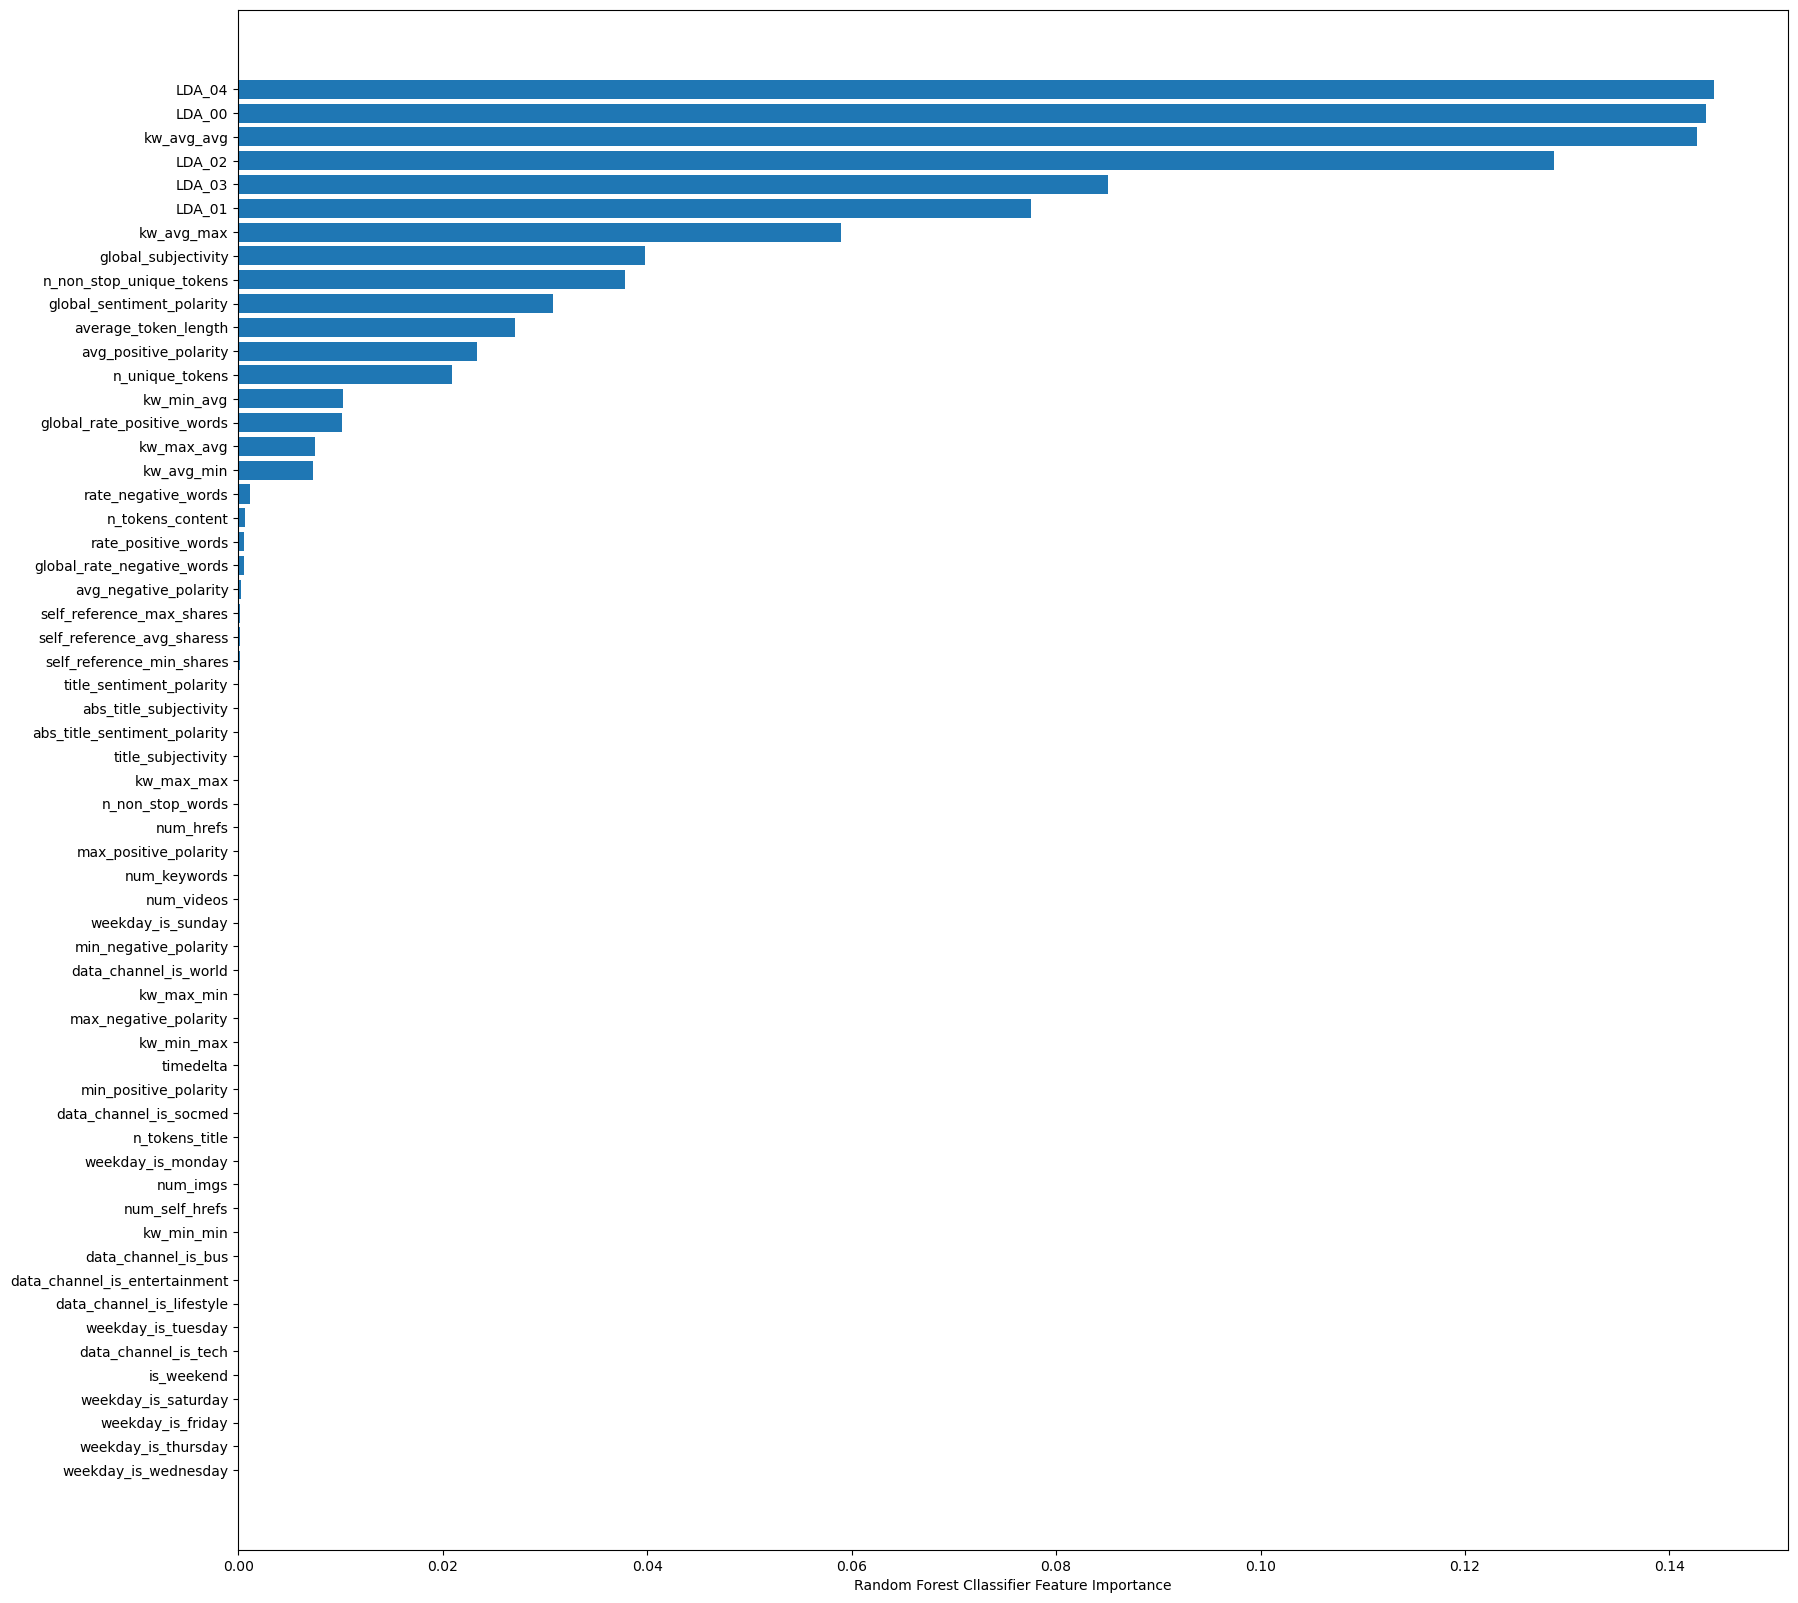

In [100]:
feature_names=X_train.columns
plt.figure(figsize=(20,20))
rf_1.feature_importances_
sorted_idx=rf_1.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx],rf_1.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Cllassifier Feature Importance')